In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Distance-based MRT Fares

In [4]:
df = pd.read_csv('mrtfares_dec2016.csv')

In [5]:
df.head(3)

,distance,single_trip_ticket_fare_per_ride,adult_card_fare_per_ride,senior_citizen_card_fare_per_ride,student_card_fare_per_ride,workfare_transport_concession_card_fare_per_ride,persons_with_disabilities_card_fare_per_ride
0,Up to 3.2 km,140,77,54,37,63,54
1,3.3 km - 4.2 km,160,87,61,42,71,61
2,4.3 km - 5.2 km,160,97,68,47,79,68


In [6]:
df.columns

Index(['distance', 'single_trip_ticket_fare_per_ride',
       'adult_card_fare_per_ride', 'senior_citizen_card_fare_per_ride',
       'student_card_fare_per_ride',
       'workfare_transport_concession_card_fare_per_ride',
       'persons_with_disabilities_card_fare_per_ride'],
      dtype='object')

In [7]:
df.columns = ['distance','single trip','adult','senior','student','concession','disable']

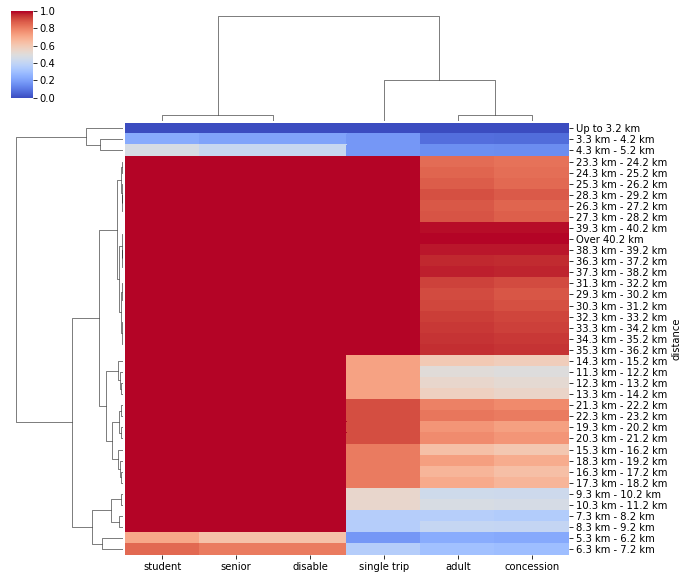

In [10]:
sns.clustermap(df.set_index('distance'), cmap='coolwarm', standard_scale=1)

In [31]:
df_avg = df.set_index('distance').apply(np.mean).div(100).round(2).sort_values(ascending=False)
df_avg

single trip    2.26
adult          1.65
concession     1.35
disable        0.85
senior         0.85
student        0.57
dtype: float64

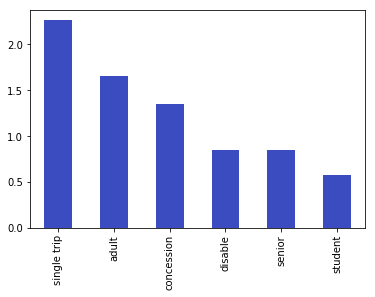

In [34]:
df_avg.plot(kind='bar', cmap='coolwarm')
# Student fees are the lowest across 

# Ridership

In [55]:
rider = pd.read_csv('ridership.csv')
rider.head()

,year,type_of_public_transport,average_ridership
0,1995,MRT,740000
1,1995,LRT,0
2,1995,Bus,3009000
3,1995,Taxi,0
4,1996,MRT,850000


In [56]:
rider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
year                        88 non-null int64
type_of_public_transport    88 non-null object
average_ridership           88 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.1+ KB


In [58]:
rider.columns = ['year','type', 'avg ridership']

In [59]:
rider.describe()

,year,avg ridership
count,88.000000,8.800000e+01
mean,2005.500000,1.402852e+06
std,6.380646,1.282344e+06
min,1995.000000,0.000000e+00
25%,2000.000000,1.082500e+05
50%,2005.500000,9.670000e+05
75%,2011.000000,2.812000e+06
max,2016.000000,3.939000e+06


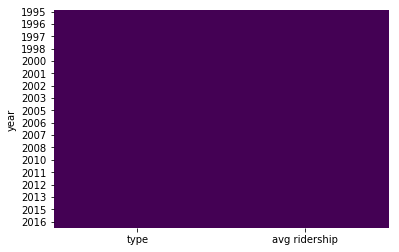

In [50]:
sns.heatmap(rider.isnull(),cbar=None,cmap='viridis')
# No null data

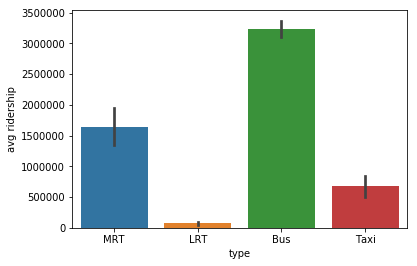

In [60]:
sns.barplot(x='type',y='avg ridership',data=rider)
# Bus still has the most ridership 

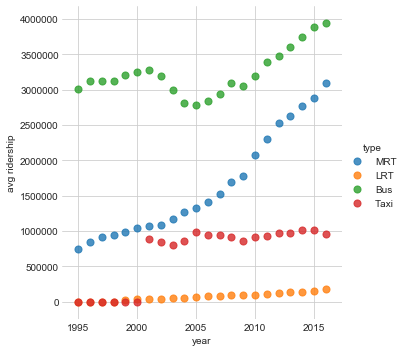

In [86]:
sns.set_style('whitegrid')
sns.lmplot(x='year',y='avg ridership',data=rider,fit_reg=False,hue='type',scatter_kws={'marker':'d','s':50})
sns.despine(bottom=True,left=True)

# What happened in 2005? 

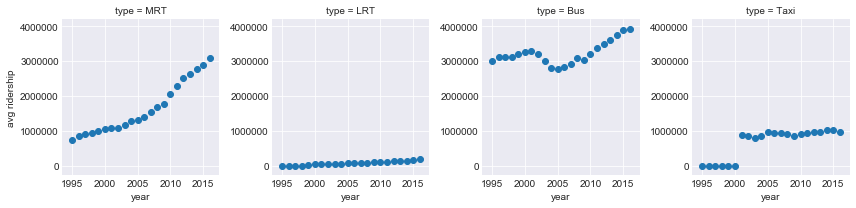

In [82]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data=rider,col='type')
g.map(plt.scatter,'year','avg ridership')

In [154]:
mrt_year = rider[rider['type']=='MRT']['year']
mrt_rider = rider[rider['type']=='MRT']['avg ridership']
bus_year = rider[rider['type']=='Bus']['year']
bus_rider = rider[rider['type']=='Bus']['avg ridership']

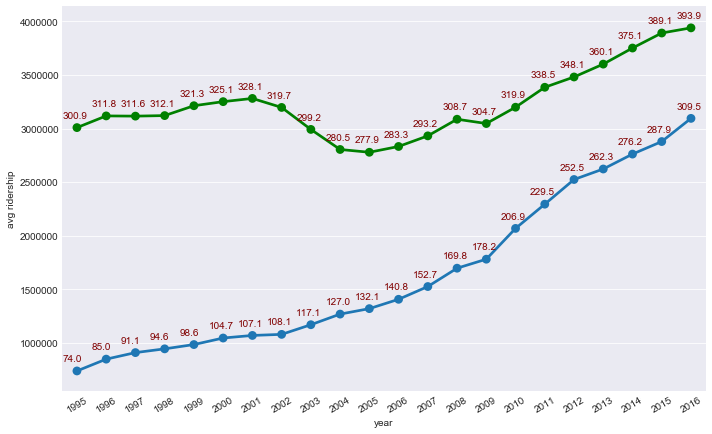

In [158]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10,6), sharex=True)
ax = sns.pointplot(x=mrt_year,y=mrt_rider)
ax1 = sns.pointplot(x=bus_year,y=bus_rider,color='g')

# zip xticks and y coors, and shift them around to fit on graph 
# ax.text doc https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.text.html
[ax.text(p[0]-0.5, p[1]+90000, p[1] / 10000, color='maroon') for p in zip(ax.get_xticks(), mrt_rider)] 
[ax1.text(p[0]-0.5, p[1]+90000, p[1] / 10000, color='maroon') for p in zip(ax1.get_xticks(), bus_rider)] 

plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

In [159]:
# Explain more on the zip method above to get label locations 
labels = zip(ax.get_xticks(),mrt_rider)
print(*labels)

(0, 740000) (1, 850000) (2, 911000) (3, 946000) (4, 986000) (5, 1047000) (6, 1071000) (7, 1081000) (8, 1171000) (9, 1270000) (10, 1321000) (11, 1408000) (12, 1527000) (13, 1698000) (14, 1782000) (15, 2069000) (16, 2295000) (17, 2525000) (18, 2623000) (19, 2762000) (20, 2879000) (21, 3095000)
